In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RSM8431 CASE_DATA.csv to RSM8431 CASE_DATA.csv


In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('RSM8431 CASE_DATA.csv')
df

,Customer_No,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,...,CUST_AFFLUENCE,SEGMENT,CLV_DEPOSITS,CLV_CREDITCARD,CLV_MORTGAGE,CLV_LOC,ACQ_SCORE,EMAILABLE,MAILABLE,MILLENNIAL
0,1,51 or higher,21-30 years,1,0,0,1,-106,0,0,...,1,Gold,"1,314.29",0.000,0.000,-112.340,0.15,1,1,0
1,2,31-50,21-30 years,1,0,0,1,-186,0,0,...,4,Platinum,0,0.000,0.000,3542.770,0.16,1,0,0
2,3,31-50,21-30 years,1,1,1,1,-193,984,1402,...,4,Gold,"1,547.89",7761.550,94024.415,-4.965,0.20,1,1,1
3,4,31-50,21-30 years,1,1,1,1,-216,1550,3338,...,3,Platinum,94.36,930.390,26864.330,323.120,0.19,1,1,0
4,5,51 or higher,21-30 years,1,1,1,1,86,359,-255,...,4,Platinum,"4,083.42",791.325,9191.885,-112.340,0.17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,31-50,10 years or under,1,1,1,0,-141,-1559,10588,...,3,Gold,584.87,0.000,51105.450,0.000,0.19,1,0,1
9996,9997,51 or higher,30 years or higher,1,1,1,1,-156,711,1625,...,4,Platinum,"1,601.16",8197.090,53888.710,20955.860,0.15,1,1,0
9997,9998,30 or under,10 years or under,1,1,0,1,-24,-379,0,...,4,Gold,466.91,6002.095,0.000,-112.340,0.17,1,1,1
9998,9999,31-50,21-30 years,1,1,1,1,27,17719,1040,...,3,Platinum,0,12911.435,0.000,-112.340,0.18,1,0,1


In [ ]:
df.isna().sum()

Customer_No           0
Age_Group             0
Tenure                0
DEP_IND               0
CC_IND                0
MTG_IND               0
LOC_IND               0
DEP_PROF              0
CC_PROF               0
MTG_PROF              0
LOC_PROF              0
AREA                  0
MOBILE_ACTIVE         0
PAYROLL_DEPOSIT       0
CSAT               5151
CX_QUALITY           37
CUST_ENGAGEMENT       0
CUST_AFFLUENCE        0
SEGMENT               3
CLV_DEPOSITS          0
CLV_CREDITCARD        0
CLV_MORTGAGE          0
CLV_LOC               0
ACQ_SCORE             0
EMAILABLE             0
MAILABLE              0
MILLENNIAL            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_No      10000 non-null  int64  
 1   Age_Group        10000 non-null  object 
 2   Tenure           10000 non-null  object 
 3   DEP_IND          10000 non-null  int64  
 4   CC_IND           10000 non-null  int64  
 5   MTG_IND          10000 non-null  int64  
 6   LOC_IND          10000 non-null  int64  
 7   DEP_PROF         10000 non-null  int64  
 8   CC_PROF          10000 non-null  int64  
 9   MTG_PROF         10000 non-null  int64  
 10  LOC_PROF         10000 non-null  float64
 11  AREA             10000 non-null  object 
 12  MOBILE_ACTIVE    10000 non-null  int64  
 13  PAYROLL_DEPOSIT  10000 non-null  int64  
 14  CSAT             4849 non-null   float64
 15  CX_QUALITY       9963 non-null   object 
 16  CUST_ENGAGEMENT  10000 non-null  int64  
 17  CUST_AFFLUENC

In [ ]:
df.shape

(10000, 27)

# SEGMENTATION AND DATA EXPLORATION

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import numpy as np

# Encoding categorical data
label_encoders = {}
for column in ['Age_Group', 'Tenure', 'SEGMENT', 'AREA', 'CX_QUALITY', 'CLV_DEPOSITS']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Selecting columns for clustering
df=df.dropna()
columns_to_use = df.columns
cluster_data = df[columns_to_use]

# Scaling the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=420)
cluster_labels = kmeans.fit_predict(cluster_scaled)

# Adding the cluster labels to the original dataframe for analysis
df['Cluster'] = cluster_labels

# Viewing how many customers fall into each cluster
cluster_counts = df['Cluster'].value_counts()
cluster_counts


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-7-04ea4b362ec1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


Cluster
8    1576
5    1010
2     587
7     367
3     347
1     276
4     258
6     239
0     147
9      42
Name: count, dtype: int64

In [ ]:
# Calculating mean values for each cluster to understand their characteristics
cluster_profiles = df.groupby('Cluster')[columns_to_use].mean()

# Decoding the categorical values back to original for better interpretation
for column in ['Age_Group', 'Tenure', 'SEGMENT', 'AREA', 'CX_QUALITY', 'CLV_DEPOSITS']:
    cluster_profiles[column] = label_encoders[column].inverse_transform(cluster_profiles[column].round().astype(int))

cluster_profiles

,Customer_No,Age_Group,Tenure,DEP_IND,CC_IND,MTG_IND,LOC_IND,DEP_PROF,CC_PROF,MTG_PROF,...,CUST_AFFLUENCE,SEGMENT,CLV_DEPOSITS,CLV_CREDITCARD,CLV_MORTGAGE,CLV_LOC,ACQ_SCORE,EMAILABLE,MAILABLE,MILLENNIAL
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6977.074830,31-50,11-20 years,0.000000,0.605442,0.721088,0.843537,0.000000,773.374150,1423.299320,...,3.510204,Platinum,"1,065.17",1627.539354,32836.592891,2310.259830,0.157483,0.598639,0.557823,0.374150
1,4333.626812,51 or higher,21-30 years,0.996377,0.724638,0.496377,1.000000,173.043478,325.463768,145.753623,...,3.880435,Platinum,"2,945.30",1298.699112,10531.150453,9051.181576,0.165290,0.960145,0.579710,0.086957
2,6137.052811,31-50,11-20 years,1.000000,0.919932,0.678024,0.943782,-18.364566,1136.436116,478.758092,...,3.339012,Gold,"2,895.35",3833.616499,16397.143595,266.300647,0.191721,1.000000,0.522998,0.502555
3,4661.982709,51 or higher,21-30 years,1.000000,0.708934,0.564841,0.766571,352.256484,565.864553,562.432277,...,3.564841,Platinum,"2,981.98",1725.716916,14764.895303,1235.576499,0.164265,0.000000,0.530259,0.233429
4,5866.852713,51 or higher,11-20 years,0.996124,0.689922,1.000000,0.930233,93.054264,471.488372,6667.348837,...,3.934109,Platinum,21.54,1917.437016,86150.932791,1401.026143,0.176240,0.980620,0.488372,0.205426
5,6667.422772,30 or under,10 years or under,1.000000,0.918812,0.887129,0.948515,-3.674257,455.856436,730.900990,...,3.800990,Platinum,"2,988.32",2206.973762,23271.372881,623.609871,0.177238,1.000000,0.589109,0.924752
6,4020.983264,51 or higher,21-30 years,0.995816,1.000000,0.443515,0.853556,55.092050,5267.715481,268.891213,...,3.552301,Gold,"2,838.13",8767.534268,9748.296172,866.797720,0.180084,1.000000,0.518828,0.209205
7,4532.049046,51 or higher,21-30 years,1.000000,0.602180,0.209809,0.128065,627.683924,399.512262,167.670300,...,3.247956,Gold,"2,891.04",1658.846008,6221.656512,76.304033,0.161308,1.000000,0.623978,0.182561
8,3510.655457,51 or higher,21-30 years,1.000000,0.887056,0.571701,0.998096,187.250000,368.019036,198.618020,...,3.690990,Platinum,274.37,1880.005765,9943.264540,718.724486,0.173382,1.000000,0.532360,0.076142


Key Insights from Data Exploration:
1. Age and Tenure Distribution: The customer base includes a significant portion of older, long-term customers, particularly in the Platinum segment, suggesting a stable but potentially less growth-oriented customer segment.
2. Customer Engagement Levels: There is a noticeable variation in customer engagement scores across the segments. While some older segments demonstrate moderate to high engagement, there is a segment with notably lower engagement, indicating a need for targeted strategies to enhance interaction and satisfaction.
3. Product Penetration and Profitability: The initial data exploration did not delve into specific product penetration rates (e.g., deposits, credit cards, mortgages) and their profitability. However, customer segmentation showed a high prevalence of Platinum status across most clusters, implying a focus on potentially higher-value customers.

Measuring Value:
1. Customer Lifetime Value (CLV): Continue to track and enhance the CLV by segment, focusing on increasing the profitability of each customer through upselling and cross-selling.
2. Engagement Scores and Retention Rates: Monitor changes in engagement scores after implementing targeted strategies. Improved engagement should correlate with better retention and reduced churn.
3. Product Penetration Rates: Measure the uptake of new and existing products within these segments to ensure that marketing and product offerings are effectively meeting customer needs.

Shaping Future Strategy:
1. Digital First for Younger Customers: For Cluster 1, focus on digital-first strategies, leveraging mobile and online platforms to introduce personal finance management tools, financial literacy content, and innovative banking services.
2. Customized Services for Less Engaged Customers: For Cluster 2, introduce personalized financial advisory services, possibly enhanced by AI-driven insights, to provide value that directly addresses their specific life stages and financial needs.

Going Forward with a CRM System:
1. Data Integration and Management: Invest in robust data management systems to ensure that customer data from various sources is integrated, consistent, and accessible. This will support advanced analytics and personalized marketing.
2. Advanced Analytics Capabilities: Implement advanced analytics and machine learning models to predict customer behaviors, product suitability, and churn risk. These capabilities can drive proactive engagement strategies.
3. Additional Data Sources:
  - Social Media and Online Behavior: Integrating data from social platforms could provide insights into customer preferences and lifestyle, enhancing the ability to tailor marketing messages.
  - Transaction Data Analysis: Detailed analysis of transaction data can help understand spending habits and potential financial needs.
  - Feedback and Survey Responses: Collecting and analyzing direct customer feedback can provide qualitative insights into customer satisfaction and areas for improvement.

By focusing on these areas, GTA Bank can develop a CRM system that not only supports current operational needs but also drives strategic growth through better customer understanding and engagement.

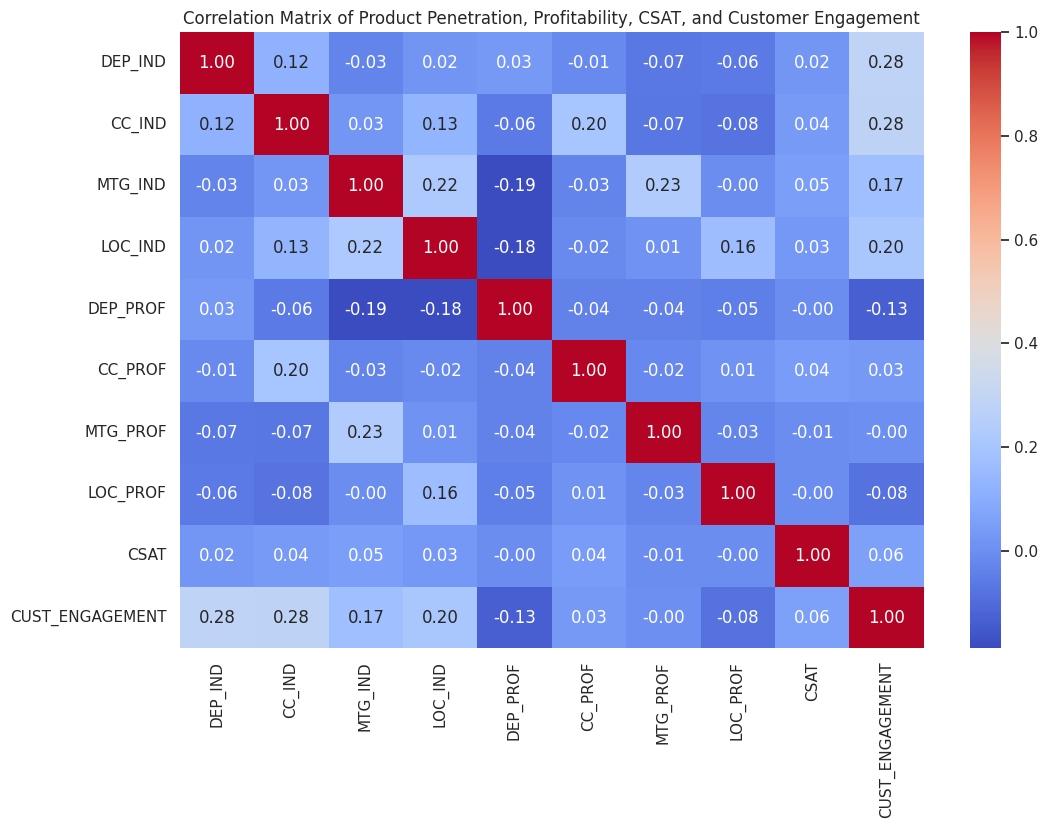

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization environment
sns.set(style="whitegrid")

# Exploring product penetration and relationship with CSat and profitability
product_columns = ['DEP_IND', 'CC_IND', 'MTG_IND', 'LOC_IND']
profitability_columns = ['DEP_PROF', 'CC_PROF', 'MTG_PROF', 'LOC_PROF']

# Calculate correlations
correlation_matrix = df[product_columns + profitability_columns + ['CSAT', 'CUST_ENGAGEMENT']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Product Penetration, Profitability, CSAT, and Customer Engagement')
plt.show()


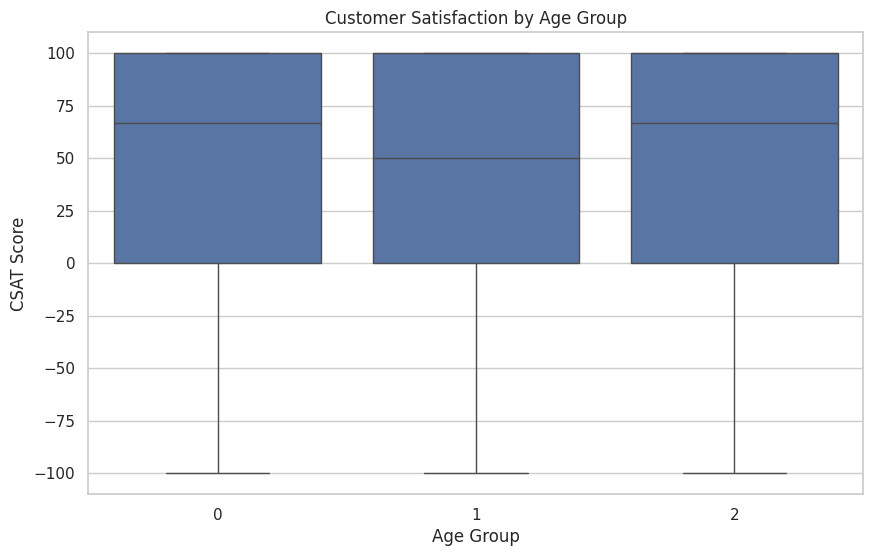

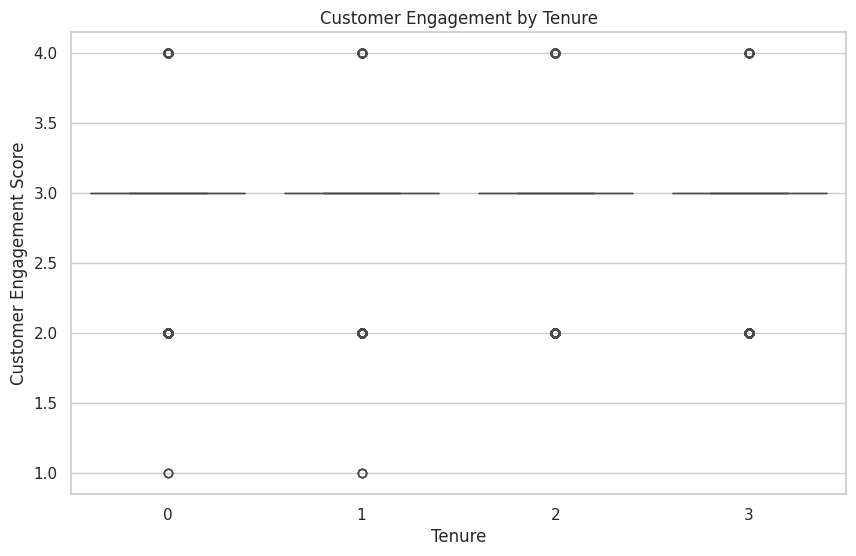

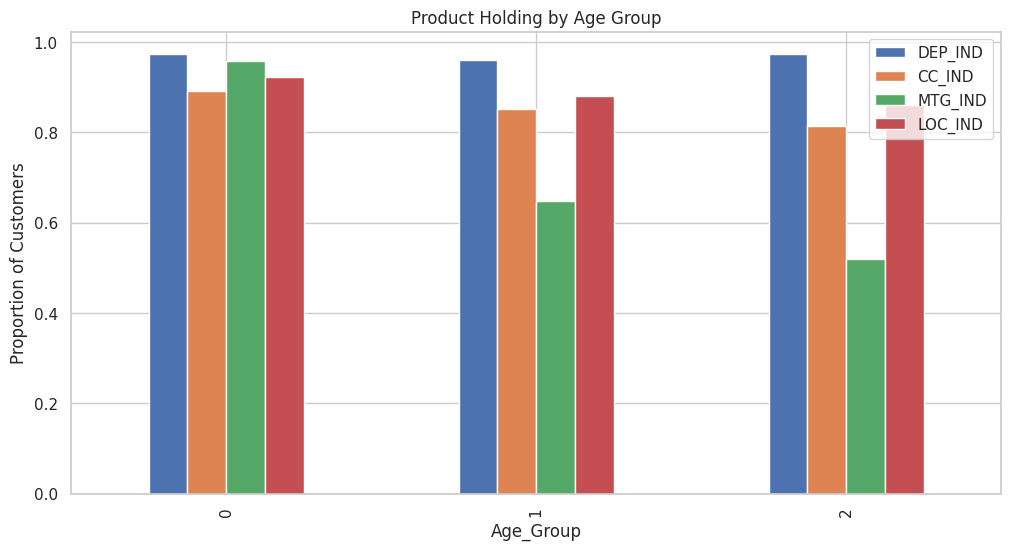

In [ ]:
# Analyzing demographic distributions and their relation to CSAT and engagement

# Plotting Age Group vs. CSAT
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='CSAT', data=df)
plt.title('Customer Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('CSAT Score')
plt.show()

# Plotting Tenure vs. Customer Engagement
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tenure', y='CUST_ENGAGEMENT', data=df)
plt.title('Customer Engagement by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Customer Engagement Score')
plt.show()

# Checking product holding by age group
product_holding_by_age = df.groupby('Age_Group')[product_columns].mean()
product_holding_by_age.plot(kind='bar', figsize=(12, 6), title='Product Holding by Age Group')
plt.ylabel('Proportion of Customers')
plt.show()


In [ ]:
import plotly.express as px

# Create a scatter plot of CSAT vs. Customer Engagement
fig1 = px.scatter(df, x="CSAT", y="CUST_ENGAGEMENT", color='Age_Group')
fig1.show()

# Create a box plot of CSAT by tenure
fig3 = px.box(df, x="Tenure", y="CSAT")
fig3.show()


In [ ]:
# Create a histogram of customer ages
fig4 = px.histogram(df, x="Age_Group", nbins=10)
fig4.show()

# Create a scatter plot of CSAT vs. CLV
fig6 = px.scatter(df, x="CSAT", y="CLV_DEPOSITS", color='Age_Group')
fig6.show()


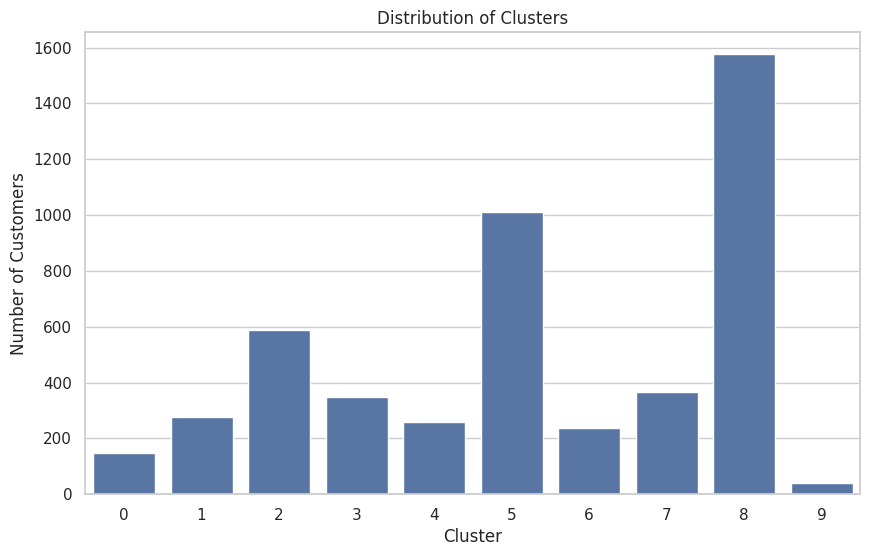

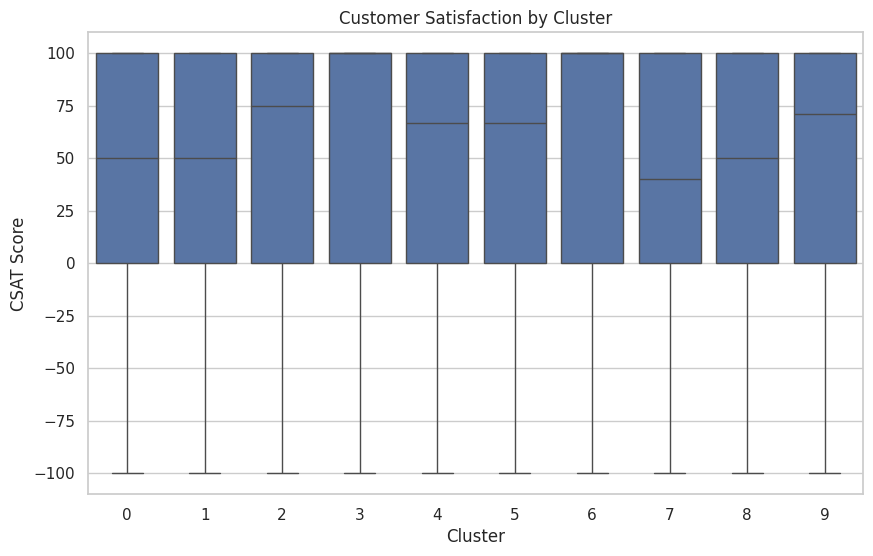

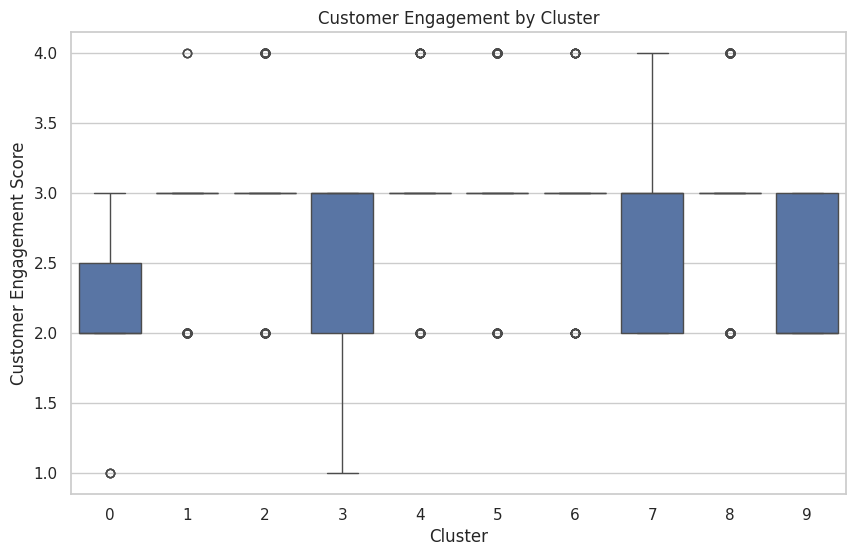

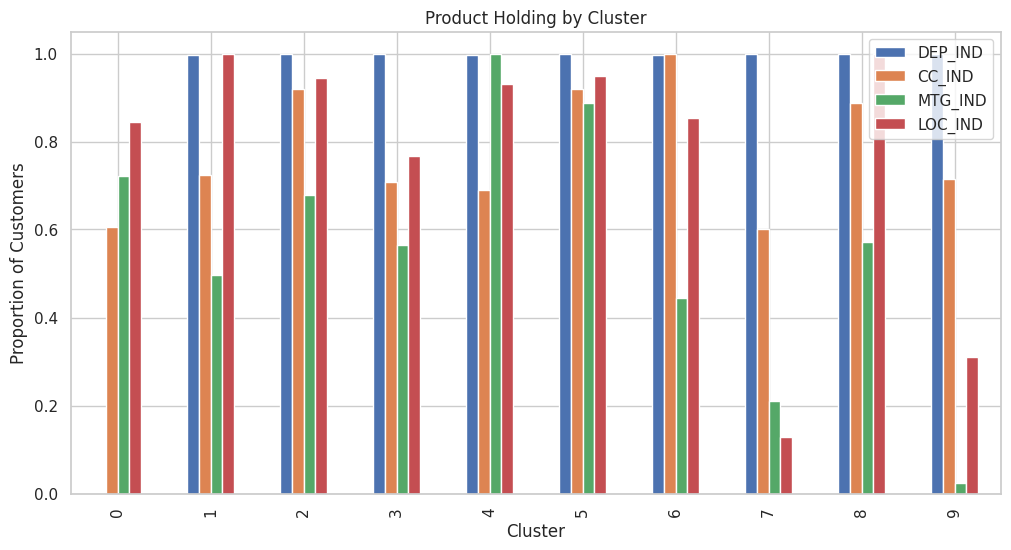

In [ ]:
import matplotlib.pyplot as plt
# Visualizing the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Plotting CSAT by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='CSAT', data=df)
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('CSAT Score')
plt.show()

# Plotting customer engagement by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='CUST_ENGAGEMENT', data=df)
plt.title('Customer Engagement by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Engagement Score')
plt.show()

# Analyzing product penetration by cluster
product_holding_by_cluster = df.groupby('Cluster')[product_columns].mean()
product_holding_by_cluster.plot(kind='bar', figsize=(12, 6), title='Product Holding by Cluster')
plt.ylabel('Proportion of Customers')
plt.show()


In [ ]:
# Create a scatter plot of CSAT vs. CLV colored by cluster
fig7 = px.scatter(df, x="CSAT", y="CLV_DEPOSITS", color='Cluster')
fig7.show()

# Create a 3D scatter plot of CSAT, CLV, and Tenure colored by cluster
fig8 = px.scatter_3d(df, x="CSAT", y="CLV_DEPOSITS", z="Tenure", color='Cluster')
fig8.show()

# Create a pie chart of the distribution of customers by cluster
fig9 = px.pie(df, values='Cluster', names='Cluster', title='Distribution of Customers by Cluster')
fig9.show()

# Create a sunburst chart of product holding by cluster and age group
fig10 = px.sunburst(df, path=['Cluster', 'Age_Group'], values='AREA', title='Product Holding by Cluster and Age Group')
fig10.show()

# Create a violin plot of CSAT by cluster and tenure
fig11 = px.violin(df, y="CSAT", x="Cluster", color='Tenure', box=True, title='CSAT by Cluster and Tenure')
fig11.show()


# PART 1

Current State of Data in the Organization:
From the dataset provided and our analysis, it appears that GTA Bank has access to various customer data points, including demographic information, product holdings, customer satisfaction scores, and engagement metrics. However, there are a few challenges and gaps that may hinder the full effectiveness of a CRM system:

1. Data Integration and Quality: There may be issues with data integration from different sources and systems, which can lead to inconsistent data quality.
2. Real-Time Data Access: The data may not be fully updated in real-time, which is crucial for timely and effective customer interactions.
3. Advanced Analytics Capability: The bank seems to lack advanced analytics capabilities that are essential for predictive modeling and personalized customer insights.

Data Management Needs to Unlock Full CRM Value:
1. Centralized Data Repository: Implement a data warehouse or data lake that centralizes all customer data across different systems and platforms. This would ensure data consistency and make it more accessible for analysis.
2. Data Quality Management: Establish robust data governance practices to ensure the accuracy, completeness, and reliability of data. This includes regular audits, data cleaning processes, and validation checks.
3. Real-Time Data Processing: Invest in technologies that allow real-time data processing and updates. This capability is essential for triggering timely marketing campaigns, alerts, and personalized customer interactions based on real-time behaviors and transactions.
4. Advanced Data Analytics Tools: Adopt advanced data analytics and business intelligence tools that can handle large datasets and complex analyses. This includes predictive modeling, customer segmentation, and machine learning algorithms to derive deeper insights into customer behaviors and preferences.

Addressing Current Gaps and Future Adaptability:
1. Enhance Data Collection Methods: Expand the data collection to include more granular details such as interaction logs, social media activities, and online behavior patterns. This richer dataset will provide a more comprehensive view of the customer.
2. Integrate New Data Sources: To enhance the CRM system, integrate additional data sources like external market data, credit scores, and economic indicators which can provide context to customer behaviors and potential financial needs.
3. Scalable and Flexible Data Architecture: Design a scalable and flexible data architecture that can easily integrate new data sources and adapt to evolving business needs. This should support modular upgrades and incorporation of new technologies such as AI and IoT.
4. Continuous Learning and Improvement: Implement a continuous learning system where the CRM system is regularly updated based on new data and insights. Use A/B testing and feedback loops to refine strategies and customer interactions based on actual performance and customer feedback.
5. Training and Change Management: Ensure that staff are trained on the new data tools and processes. Implement a change management program to help employees adapt to the new CRM system and data-driven culture.